### Carregando o Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dataset = pd.read_csv('train.csv')

## EDA

#### Vendo os primeiros registros

In [3]:
dataset.head(10) # olhando os 10 primeiros registros

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Conferindo as características do dataset

In [4]:
dataset.describe() # vendo detalhes sobre as colunas numéricas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset.info() # vendo informações do dataset, como o número de valores nulos e o tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
np.unique(dataset['Survived'], return_counts=True) # Olhando as classes do atributo survived e quantos tem para cada um

(array([0, 1]), array([549, 342]))

#### Conferindo os valores nulos

In [7]:
dataset.isna().sum() # conferindo o total de valores nulos por atributo

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dataset.isna().mean() # há mais de 70% de valores faltantes, oq pode se considerar inviavel trabalhar com esse atributo

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Limpando os Dados

#### Retirando algumas colunas

In [9]:
dataset.drop('Cabin', axis=1, inplace=True ) # retirando a coluna Cabin por contem mais de 77% de valores nulos
dataset.drop(['Name', 'Ticket', 'Fare', 'PassengerId'], axis=1, inplace=True) # retirando a coluna name, ticket, Fare e PassengerId por não ser importante ao algoritmo posteriormente
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
dataset.isna().sum() # vendo novamente as somas dos valores nulos

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

#### Tratando os valores nulos

In [11]:
dataset.loc[dataset['Age'].isna()].head(10) # olhando alguns registros que tem os valores do atributo age como nulo

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
29,0,3,male,NaN,0,0,S
31,1,1,female,NaN,1,0,C
32,1,3,female,NaN,0,0,Q
36,1,3,male,NaN,0,0,C
42,0,3,male,NaN,0,0,C


In [15]:
median = dataset['Age'].median() # pegando a mediana de age
median

np.float64(28.0)

In [16]:
dataset['Age'].fillna(median, inplace=True) # preenchendo os valores nulos de age com a mediana obtida

In [ ]:
dataset.isna().sum() # há apenas dois valores faltantes no atributo Embarked

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [18]:
dataset[dataset['Embarked'].isna()] # vendo os registros em que há valores faltantes de embarked

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [ ]:
tabela_cruzada = pd.crosstab(dataset['Embarked'], dataset['Pclass']) # olhando a relação de Pclass com embarked
tabela_cruzada

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [ ]:
dataset['Embarked'].fillna('S', inplace=True) # Colocando o valor S nos dois registros que continha valor nulo

In [23]:
dataset.isna().sum() # não há mais valores faltantes no dataset


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

## Visualizando alguns insights

In [ ]:
dataset.groupby('Sex')['Survived'].sum() # olhando quantas pessoas de cada sexo sobreviveram

Sex
female    233
male      109
Name: Survived, dtype: int64

In [54]:
sobrevivencia_por_class = dataset.groupby('Pclass')['Survived'].sum() # olhando quantas pessoas sobreviveram por classe social
sobrevivencia_por_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

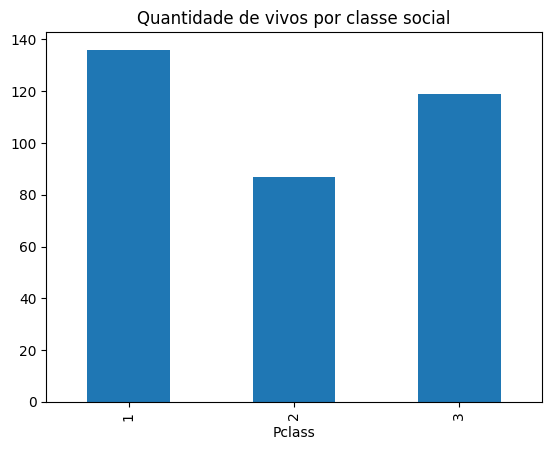

In [53]:
sobrevivencia_por_class.plot(kind='bar', title='Quantidade de vivos por classe social'); # visualizando melhor em gráfico a relação

In [52]:
sobrevivencia_por_classe_genero = dataset.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='sum') # vendo a quantidade de sobreviventes por classe social e genero
sobrevivencia_por_classe_genero 

Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


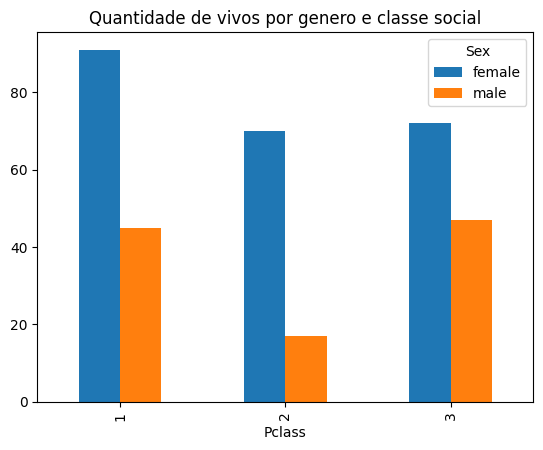

In [51]:
sobrevivencia_por_classe_genero.plot(kind='bar', title='Quantidade de vivos por genero e classe social'); # visualizando em gráfico

In [ ]:
men_and_woman = dataset.pivot_table(values='Age', index='Pclass', columns=['Survived', 'Sex']) # vendo a média de idade por classe social, além do genero e se sobreviveu ou não
men_and_woman

Survived          0                     1           
Sex          female       male     female       male
Pclass                                              
1         25.666667  41.136364  34.252747  35.331556
2         36.000000  32.956044  28.078571  17.431176
3         24.805556  27.466667  22.340278  23.370638

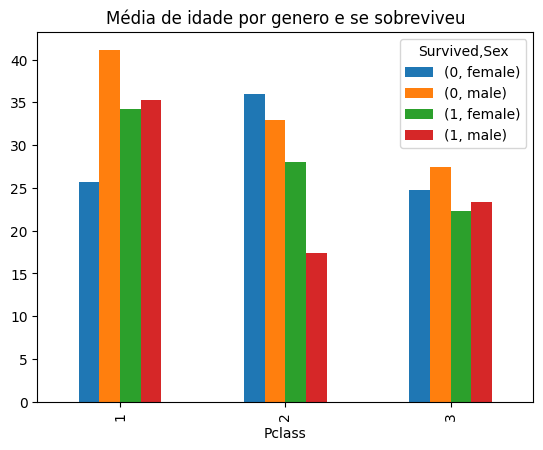

In [ ]:
men_and_woman.plot(kind='bar', title='Média de idade por genero e se sobreviveu'); #visualizando em gráfico, legenda= (0) se não sobreviveu e (1) se sobreviveu

In [ ]:
irmaos = dataset.pivot_table(values='Parch', index='Sex', columns='Pclass', aggfunc='sum') # Número de pais/filhos por genero e classe social
irmaos

Pclass,1,2,3
Sex,,,
female,43,46,115
male,34,24,78


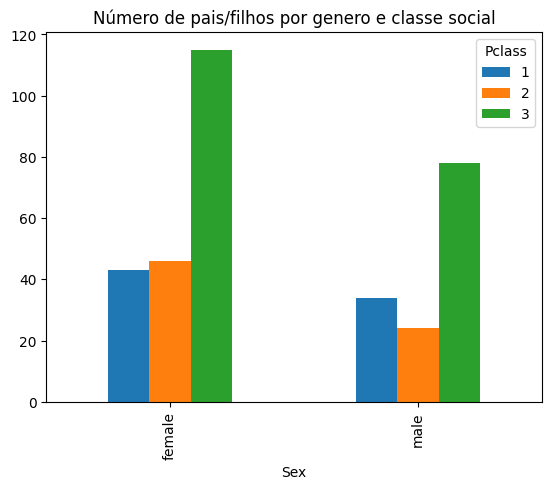

In [ ]:
irmaos.plot(kind='bar', title='Número de pais/filhos por genero e classe social'); # visualizando o gráfico

In [55]:
grafico_genero_idade = px.treemap(dataset, path=['Pclass', 'Sex','Age'], title='Relação de classe social, gênero e idade') # vendo qual a idade predominante em cada classe e genero
grafico_genero_idade.show()

## Pré processando os dados

In [47]:
dataset.head() # olhando os 5 primeiros registros novamente

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### Separando em X e Y

In [ ]:
X_dataset = dataset.iloc[:, 1:6].to_numpy() # escolhendo até o Parch por apresentar melhor acuracia
y_dataset = dataset['Survived']
y_dataset = y_dataset.replace({0:'Não sobreviveu', 1:'Sobreviveu'})
y_dataset = y_dataset.to_numpy()

In [50]:
np.unique(y_dataset) # vendo as classes agora como tipo objeto

array(['Não sobreviveu', 'Sobreviveu'], dtype=object)

#### Tratando valores categóricos

In [56]:
from sklearn.preprocessing import LabelEncoder # importando o labelencoder

In [57]:
Sex_encoder = LabelEncoder()
Embarked_encoder = LabelEncoder()
X_dataset[:, 1] = Sex_encoder.fit_transform(X_dataset[:, 1])
#X_dataset[:, 5] = Embarked_encoder.fit_transform(X_dataset[:,5])

In [58]:
np.unique(X_dataset[:, 1], return_counts=True)

(array([0, 1], dtype=object), array([314, 577]))

In [ ]:
#np.unique(X_dataset[:, 5], return_counts=True)

(array([0, 1, 2], dtype=object), array([168,  77, 646]))

#### Separando os dados em teste e treino

In [59]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_dataset, y_dataset, test_size=0.15, random_state=0)

## Treinamento do modelo

In [60]:
Arvore_titanic = RandomForestClassifier(criterion='entropy', random_state=0, n_estimators=100, max_leaf_nodes=80)
Arvore_titanic

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,80
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
Arvore_titanic.fit(X_treino, y_treino)
previsao = Arvore_titanic.predict(X_teste)

In [ ]:
accuracy_score(y_teste, previsao) # olhando a acuracia, ficou com 81% 

0.8134328358208955

In [64]:
confusion_matrix(y_teste, previsao)

array([[70,  9],
       [16, 39]])

In [65]:
print(classification_report(y_teste, previsao))

                precision    recall  f1-score   support

Não sobreviveu       0.81      0.89      0.85        79
    Sobreviveu       0.81      0.71      0.76        55

      accuracy                           0.81       134
     macro avg       0.81      0.80      0.80       134
  weighted avg       0.81      0.81      0.81       134

